In [1]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


# Most general form of cross-validation
---

This provides no personalization, and still avoids the issue of using a subject's future data for prediction.

In [2]:
from os import path
import sys

import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = path.join("..", 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport models.fit_predict
%aimport visualization.visualize
from models.fit_predict import cv_predict
from visualization.visualize import modified_bland_altman_plot

In [3]:
file = path.join("..", "data", "interim", "df.csv")
df_orig = pd.read_csv(file, index_col=0)

## Compute features

In [4]:
features = []

### $n$ days of temperature measurements.

The use case requires deleting those whose ovulation occurs before these $n$ days.

In [5]:
NUMBER_OF_DAYS = 10
df = df_orig[df_orig.L_PREOVULATION > NUMBER_OF_DAYS]  # No use predicting backward in time.
temp_measurements = ["TEMP" + str(i + 1) for i in range(NUMBER_OF_DAYS)]
features += temp_measurements

In [6]:
X = df[features]
y = df.L_PREOVULATION
grouping = df.ID

## Perform regression

In [7]:
y_pred = cv_predict(X, y, grouping)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.9s finished


In [8]:
mean_squared_error(y_pred=y_pred, y_true=y)

14.937386091201832

In [9]:
mean_absolute_error(y_pred=y_pred, y_true=y)

2.7544865873740281

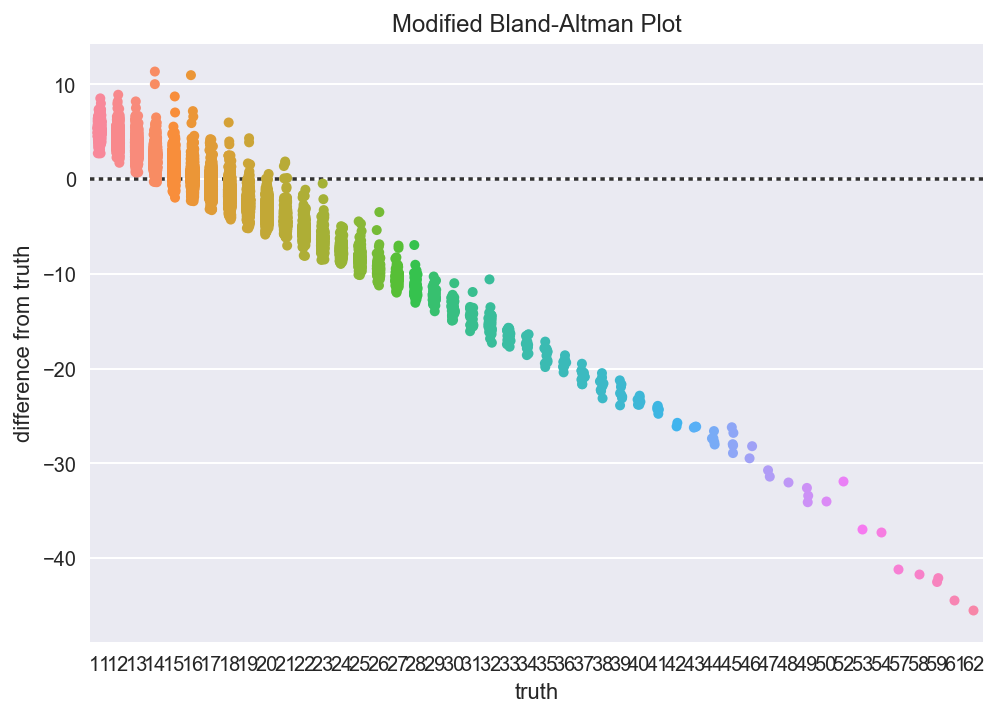

In [10]:
modified_bland_altman_plot(y_pred, y);

## Discussion
---

This model is extremely simple. Our features are only the first six temperatures of the cycle and the participant's age. With it, we achieve a MSE of about 18, which is not that far from the Bortot paper's 15. And with the first ten days, we get about 16.5. In terms of use case, they are about equal to the Bortot result.

In [11]:
df.L_PERIOD.median()

5.0

Now, the median period length is 5, which means that we are really using measurements of BBT during the period to determine the day of ovulation.

Since this model has no personalization at all, it's exciting to see how well a personalized model will do.